Tin Dizdarevic 

UCID: 31509390

ENGR 301 - Laboratory 3

Topic: Environmental Engineering

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


# Part 1


## 1.1

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# create dataframes
dfPwr1 = pd.read_csv('drive/My Drive/Colab Notebooks/ENGR 301/Lab3/plant1_power.csv')
dfPwr2 = pd.read_csv('drive/My Drive/Colab Notebooks/ENGR 301/Lab3/plant2_power.csv')
dfWeather1 = pd.read_csv('drive/My Drive/Colab Notebooks/ENGR 301/Lab3/plant1_weather.csv')
dfWeather2 = pd.read_csv('drive/My Drive/Colab Notebooks/ENGR 301/Lab3/plant2_weather.csv')

## 1.2

Plant 1 has a higher average daily power yield over the 34 day period. 

Plant 2 produced the highest daily power yield.

Plant 2 was on average hotter.



In [ ]:
# average daily power yield for plant 1
dfPwr1['DAILY_YIELD'].mean()

3295.968737182587

In [ ]:
# average daily power yield for plant 2
dfPwr2['DAILY_YIELD'].mean()

3294.8902951797813

In [ ]:
# highest daily power yield for plant 1
dfPwr1['DAILY_YIELD'].max()

9163.0

In [ ]:
# highest daily power yield for plant 2
dfPwr2['DAILY_YIELD'].max()

9873.0

In [ ]:
# average temperature of plant 1
dfWeather1['AMBIENT_TEMPERATURE'].mean()

25.531605717564393

In [ ]:
# average temperature of plant 2
dfWeather2['AMBIENT_TEMPERATURE'].mean()

28.06939988232112

## 1.3

In [ ]:
dfPwr1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
dfWeather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


### a)

In [ ]:
dfPwr1['DATE_TIME'] = pd.to_datetime(dfPwr1['DATE_TIME'], dayfirst=True)
dfPwr2['DATE_TIME'] = pd.to_datetime(dfPwr2['DATE_TIME'], dayfirst=True)
dfWeather1['DATE_TIME'] = pd.to_datetime(dfWeather1['DATE_TIME'], yearfirst=True)
dfWeather2['DATE_TIME'] = pd.to_datetime(dfWeather2['DATE_TIME'], yearfirst=True)

### b)

In [ ]:
merged_plant1 = dfPwr1.merge(right=dfWeather1, how='left', on='DATE_TIME')

In [ ]:
merged_plant2 = dfPwr2.merge(right=dfWeather2, how='left', on='DATE_TIME')

In [ ]:
merged_plant1.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [ ]:
merged_plant2.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


## 1.4

There are four rows for plant one which have a row containing NaN values, and there are no such rows for plant two.

Dropping these rows provides us with enough data to do the analysis. 

In [ ]:
null_data1 = merged_plant1[merged_plant1.isnull().any(axis=1)]
null_data1

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
38544,2020-06-03 14:00:00,4135001,1IF53ai7Xc0U56Y,7003.0,685.8,5601.0,6330385.0,NaN,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,4135001,adLQvlD726eNBSB,7204.0,705.4,5685.0,6419961.0,NaN,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,4135001,wCURE6d3bPkepu2,7545.0,738.7,5579.0,6928448.0,NaN,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,4135001,z9Y9gH1T5YWrNuG,7946.0,777.8,5541.0,7152815.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_data2 = merged_plant2[merged_plant2.isnull().any(axis=1)]
null_data2

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION


In [ ]:
merged_plant1 = merged_plant1.dropna()

In [ ]:
# second plant has no na values

### 1.5

There are many features that are strongly correlated, but the strongest correlation is evident between DC and AC power.
There is also a strong positive correlation between irradiation and both DC and AC power for plant 1. These is a positive correlation between DC and AC power for plant 2, but it significantly lower than the correlation for plant 1.

In [ ]:
merged_plant1.corr()

,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999996,0.082243,0.003851,NaN,0.724668,0.954811,0.989391
AC_POWER,NaN,0.999996,1.000000,0.082193,0.003840,NaN,0.724903,0.954924,0.989340
DAILY_YIELD,NaN,0.082243,0.082193,1.000000,0.009896,NaN,0.478496,0.198308,0.078317
TOTAL_YIELD,NaN,0.003851,0.003840,0.009896,1.000000,NaN,-0.036150,-0.015596,-0.005490
PLANT_ID_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBIENT_TEMPERATURE,NaN,0.724668,0.724903,0.478496,-0.036150,NaN,1.000000,0.855420,0.725278
MODULE_TEMPERATURE,NaN,0.954811,0.954924,0.198308,-0.015596,NaN,0.855420,1.000000,0.961511
IRRADIATION,NaN,0.989391,0.989340,0.078317,-0.005490,NaN,0.725278,0.961511,1.000000


In [ ]:
merged_plant2.corr()

,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999997,0.005593,0.004528,NaN,0.563232,0.749676,0.780978
AC_POWER,NaN,0.999997,1.000000,0.005395,0.004533,NaN,0.563324,0.749604,0.780851
DAILY_YIELD,NaN,0.005593,0.005395,1.000000,-0.068472,NaN,0.321785,0.046787,-0.107987
TOTAL_YIELD,NaN,0.004528,0.004533,-0.068472,1.000000,NaN,0.002774,-0.004646,-0.006720
PLANT_ID_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBIENT_TEMPERATURE,NaN,0.563232,0.563324,0.321785,0.002774,NaN,1.000000,0.848976,0.671998
MODULE_TEMPERATURE,NaN,0.749676,0.749604,0.046787,-0.004646,NaN,0.848976,1.000000,0.947057
IRRADIATION,NaN,0.780978,0.780851,-0.107987,-0.006720,NaN,0.671998,0.947057,1.000000


# Part 2

In [ ]:
from sklearn.model_selection import train_test_split

## 2.1

### a)

In [ ]:
x1 = np.array(merged_plant1["IRRADIATION"]).reshape(-1,1)

In [ ]:
y1 = np.array(merged_plant1["DC_POWER"]).reshape(-1,1)

### b)

Splitting the data into testing and training data is necessary because we have to be able to evaluate the effectiveness of our model. Every model can be fitted to the training data, but we want to predict a data point that wasn't seen before, and to do so we split the data into training and testing. 

Specifically, we use a training dataset to fit the model. The model sees and learns from this data. 

The test dataset is the sample of data used to evaluate the final model which was fitted on the training dataset. This dataset is used only once when the model is trained. 

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

### c)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression()
model1.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict1 = model1.predict(x_test1)

### d)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test1, y_predict1)
print("R2 score for this model is " + str(r2))

R2 score for this model is 0.980387013298918


### e)
Given the scatterplot below, it is obvious that there are some residuals which have arbitrarily small values, but there considering that there are 20000 datapoints, it is not signficant. I conclude that resiudals are evenly distributed, which helps validate the model. 

In [ ]:
residuals1 = y_predict1 - y_test1
residuals1

array([[  75.54097571],
       [  75.54097571],
       [ 198.41003433],
       ...,
       [  75.54097571],
       [ -38.05537049],
       [-159.14926033]])

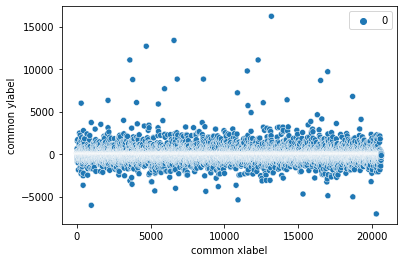

In [ ]:

ax = sns.scatterplot(data=residuals1)
ax.set(xlabel='common xlabel', ylabel='common ylabel')
ax

### f)

I avoided overfitting in this case. 

Using this approach helps recognize overfitting, because errors and score should be fairly similar for the training and the test data, which is the case for this model.

In [ ]:
model1.score(x_train1,y_train1)

0.9782506452446874

## 2.2

Irradiation is a much better predict of DC power output since $R^2$ value is higher when we use Irradiation compared to temperature. This makes sense since the correlation is stringer betweet DC and Irradiation and also it makes sense that more power is produced when solar irradiation is higher, after all that is how the plant works. Positive correlation between ambient temerature and power produced is expected to be postitive, but it is completely plausible for temperature to be low, but the sun is shining, which would still result in a high energy production. 

In [ ]:
# get x and y
x2 = np.array(merged_plant1["AMBIENT_TEMPERATURE"]).reshape(-1,1)
y2 = np.array(merged_plant1["DC_POWER"]).reshape(-1,1)
# split train and test data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.3)
# fit the model
model2 = LinearRegression()
model2.fit(x_train2, y_train2)
# predict from test data
y_predict2 = model2.predict(x_test2)

# score on the training data
model2.score(x_train2,y_train2)

0.5258694704073594

In [ ]:
# residuals for the model
residuals2 = y_predict2 - y_test2

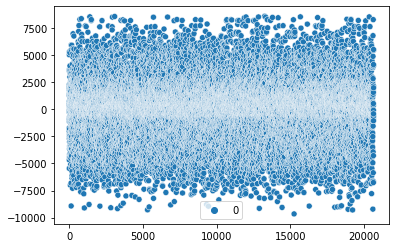

In [ ]:
# residuals evenly distributed
sns.scatterplot(data=residuals2)

In [ ]:
# r2 score
r2_score(y_test2, y_predict2)
r2 = r2_score(y_test2, y_predict2)
print("R2 score for this model is " + str(r2))

R2 score for this model is 0.523412232694854


In [ ]:
model2.score(x_train2,y_train2)

0.5258694704073594

## Part 3

Multiple regression resulted in a very high $R^2$ score for plant one, and quite a low $R^2$ score for the second plant. 
Adding additional features can be very useful in some cases when the correlation is positive. It is worth experimenting with different features, and thinking about which features to use can result in a more accurate model. 

It is also important to note that adding additional features doesn't necessarily mean our model will be better, which is the case in our models. The difference is minimal when we compare AMBIENT_TEMPERATURE and IRRADIATION model with AMBIENT_TEMPERATURE, IRRADIATION, MODULE_TEMPERATURE model.
For this reason, we really have to be careful with feature selection. 

Giving the $R^2$ values it would be completely possible to use the model to predict the solar power output if we knew an approximate amount of irradiation and temperature. Furthermore, using the model could be useful to predict the power output if we had a forecast for the upcoming days.

Given the correlation table previously constructed, it might be possible to construct a model that would make more predictions since Ambient temperature, power, and irradiation are all correlated. Important to note that correlation doesn't mean causation, so it would have to be investigated in further detail




### 3.1

In [ ]:
# PLANT 1

# get x array and y values, where x values are Ambient temperature and irradiation
x_array3 = np.array(merged_plant1[["AMBIENT_TEMPERATURE","IRRADIATION"]])
y3 = np.array(merged_plant1["DC_POWER"]).reshape(-1,1)

# split the training and the test data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_array3, y3, test_size=0.3)

# train the model 
model3 = LinearRegression()
model3.fit(x_train3, y_train3)

# predict from test data
y_predict3 = model3.predict(x_test3)

# get r2 score
print("R2 score for this model is " + str(r2_score(y_test3, y_predict3)))
model3.score(x_train3,y_train3)

R2 score for this model is 0.9783229122133582


0.9792895317077696

In [ ]:
# PLANT 2

# get x array and y values, where x values are Ambient temperature and irradiation
x_array4 = np.array(merged_plant2[["AMBIENT_TEMPERATURE", "IRRADIATION"]])
y4 = np.array(merged_plant2["DC_POWER"]).reshape(-1,1)

# split the training and the test data
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_array4, y4, test_size=0.3)

# train the model
model4 = LinearRegression()
model4.fit(x_train4, y_train4)

# predict from test data
y_predict4 = model4.predict(x_test4)
print("R2 score for this model is " + str(r2_score(y_test4, y_predict4)))

R2 score for this model is 0.6290673739263948


### 3.2 


In [ ]:
# PLANT 1

# get x array and y values, where x values are ambient temperature, irradiation
# and module temperature
x_array5 = np.array(merged_plant1[["AMBIENT_TEMPERATURE","IRRADIATION",
                                  "MODULE_TEMPERATURE"]])
y5 = np.array(merged_plant1["DC_POWER"]).reshape(-1,1)

# split the training and the test data
x_train5, x_test5, y_train5, y_test5 = train_test_split(x_array5, y5, test_size=0.3)

# train the model
model5 = LinearRegression()
model5.fit(x_train5, y_train5)

# predict from test data and evaluate model
y_predict5 = model5.predict(x_test5)
print("R2 score for this model is " + str(r2_score(y_test5, y_predict5)))
model5.score(x_train5,y_train5)

R2 score for this model is 0.978722690776966


0.9791980218510796

In [ ]:
# PLANT 2

# get x array and y values, where x values are ambient temperature, irradiation
# and module temperature
x_array6 = np.array(merged_plant2[["AMBIENT_TEMPERATURE", "IRRADIATION", 
                                  "MODULE_TEMPERATURE"]])
y6 = np.array(merged_plant2["DC_POWER"]).reshape(-1,1)

# split the training and the test data
x_train6, x_test6, y_train6, y_test6 = train_test_split(x_array6, y6, test_size=0.3)

# train the model
model6 = LinearRegression()
model6.fit(x_train6, y_train6)

# predict from test data and evaluate model
y_predict6 = model6.predict(x_test6)
r2_score(y_test6, y_predict6)

0.6117373101552469

### 3.3

Doing cross validatin is useful for assesing how the model behaves on independent data set. Using the code below, we trained several models on subsets of available data, and we should expect very similar $R^2$ scores for all the models, which is the case for the model we tested for.



In [ ]:


from sklearn.model_selection import cross_val_score
print(cross_val_score(model5, x_train5, y_train5,scoring='r2', cv=5))

print(cross_val_score(model6, x_train6, y_train6,scoring='r2', cv=5))

[0.98266539 0.97807523 0.97951084 0.9778331  0.97785132]
[0.62221515 0.62115311 0.60609409 0.61839254 0.60414233]
